**Loading Required Libraries and Files**

In [1]:
from keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0], -1)

**Applied PCA to the Features of Cifar**

In [5]:
pca = PCA()
pca.fit_transform(x_train)

array([[-6.40101763e+00,  2.72903876e+00,  1.50171052e+00, ...,
        -7.62287826e-04, -1.16359323e-03, -3.49768400e-04],
       [ 8.29783385e-01, -9.49943219e-01,  6.00375260e+00, ...,
         1.08434589e-04,  5.76715387e-04, -7.71005927e-04],
       [ 7.73019978e+00, -1.15221023e+01, -2.75362051e+00, ...,
        -1.04460109e-03, -2.14105740e-04, -3.93469526e-04],
       ...,
       [ 7.07346587e-01, -1.13425212e+01, -3.93914878e-01, ...,
        -3.80341568e-04,  1.86432348e-03,  1.44785229e-03],
       [ 1.13679090e+01, -3.37597765e+00,  5.56619766e+00, ...,
        -4.67096832e-04,  7.44972963e-04, -1.67065056e-03],
       [ 4.19279645e+00, -1.18418848e+00, -4.44596297e+00, ...,
         9.67968258e-04,  2.40363971e-04, -2.80506224e-05]])

In [6]:
pca.explained_variance_.shape

(3072,)

**the optimal value of K  decided **

In [7]:
# Calculating optimal k

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.98):
    current_sum += pca.explained_variance_[k]
    k += 1
k

444

In [8]:
## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True, svd_solver='randomized')

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

### Using Randomforest Classifier on the Cifar data !

In [9]:
rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)

y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
print(random_forest_score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.4153


### Using LogisticsRegression classifier

In [10]:
## Training ## Train 
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
## Predicting## Predi 
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

0.4054

### Using Support Vector Machine

In [12]:
## Training
svc = svm.SVC()
svc.fit(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [13]:
# Predi 
y_pred_svm = svc.predict(x_test_pca)
svc_score = accuracy_score(y_test, y_pred_svm)
svc_score

0.5158

### Using K-neighbours clf

In [14]:
# Train 
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [15]:
# Predi 
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.1768

In [24]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import *
import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

trainY = to_categorical(y_train)
testY = to_categorical(y_test)

In [25]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [27]:
model = define_model()
	# fit model
model.fit(x_train, trainY, epochs=20, batch_size=64, verbose=1)
	# save model
model.save('final_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 7s 8ms/step - loss: 1.7182 - accuracy: 0.3789
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 1.3624 - accuracy: 0.5118
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 1.2064 - accuracy: 0.5736
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 1.0784 - accuracy: 0.6197
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.9809 - accuracy: 0.6576
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.9013 - accuracy: 0.6859
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.8303 - accuracy: 0.7104
Epoch 8/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7686 - accuracy: 0.7307
Epoch 9/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7124 - accuracy: 0.7518
Epoch 10/20
782/782 [==============================] - 6s 8ms/step - loss: 0.6606 - accuracy: 0.7707

In [30]:
_, acc = model.evaluate(x_test, testY, verbose=1)
print('> %.3f' % (acc * 100.0))
cnn_acc = acc * 100

313/313 [==============================] - 1s 4ms/step - loss: 1.2257 - accuracy: 0.6965
> 69.650


## Comparing All the classifier

In [31]:
print("RandomForest ", random_forest_score)
print("SVM : ", svc_score)
print("KNN ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("CNN : ",cnn_acc)

RandomForest  0.4153
SVM :  0.5158
KNN  0.1768
Logistic Regression :  0.4054
CNN :  69.65000033378601


### Random Forest Metrics



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


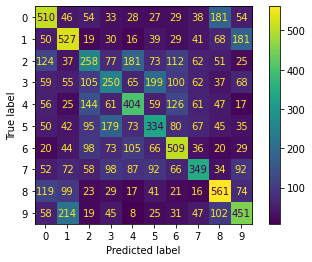

              precision    recall  f1-score   support

    airplane       0.46      0.51      0.49      1000
  automobile       0.45      0.53      0.49      1000
        bird       0.30      0.26      0.28      1000
         cat       0.29      0.25      0.27      1000
        deer       0.41      0.40      0.41      1000
         dog       0.35      0.33      0.34      1000
        frog       0.46      0.51      0.48      1000
       horse       0.45      0.35      0.39      1000
        ship       0.49      0.56      0.52      1000
       truck       0.44      0.45      0.45      1000

    accuracy                           0.42     10000
   macro avg       0.41      0.42      0.41     10000
weighted avg       0.41      0.42      0.41     10000



In [44]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, x_test_pca, y_test)  
plt.show()

class_names = ['airplane',						
'automobile', 										
'bird', 										
'cat',										
'deer', 										
'dog', 										
'frog', 										
'horse', 										
'ship', 										
'truck']


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf, target_names=class_names))

### SVM Metrics


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


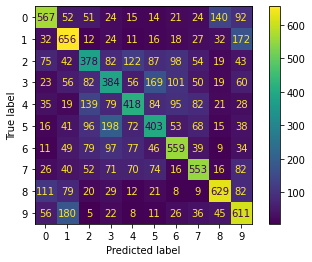

              precision    recall  f1-score   support

    airplane       0.60      0.57      0.58      1000
  automobile       0.54      0.66      0.59      1000
        bird       0.41      0.38      0.39      1000
         cat       0.38      0.38      0.38      1000
        deer       0.49      0.42      0.45      1000
         dog       0.44      0.40      0.42      1000
        frog       0.56      0.56      0.56      1000
       horse       0.59      0.55      0.57      1000
        ship       0.67      0.63      0.65      1000
       truck       0.49      0.61      0.55      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000



In [46]:

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, x_test_pca, y_test)  
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm, target_names=class_names))

### KNN Metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


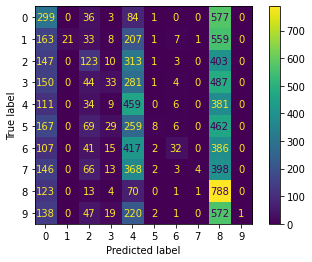

              precision    recall  f1-score   support

    airplane       0.19      0.30      0.23      1000
  automobile       1.00      0.02      0.04      1000
        bird       0.24      0.12      0.16      1000
         cat       0.23      0.03      0.06      1000
        deer       0.17      0.46      0.25      1000
         dog       0.44      0.01      0.02      1000
        frog       0.51      0.03      0.06      1000
       horse       0.67      0.00      0.01      1000
        ship       0.16      0.79      0.26      1000
       truck       1.00      0.00      0.00      1000

    accuracy                           0.18     10000
   macro avg       0.46      0.18      0.11     10000
weighted avg       0.46      0.18      0.11     10000



In [47]:

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test_pca, y_test)  
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn, target_names=class_names))

### Logistic Metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


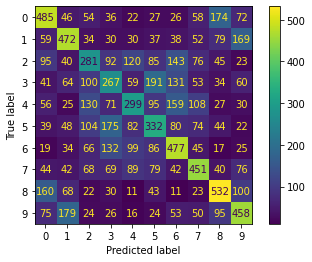

              precision    recall  f1-score   support

    airplane       0.45      0.48      0.47      1000
  automobile       0.46      0.47      0.47      1000
        bird       0.32      0.28      0.30      1000
         cat       0.29      0.27      0.28      1000
        deer       0.36      0.30      0.33      1000
         dog       0.33      0.33      0.33      1000
        frog       0.41      0.48      0.44      1000
       horse       0.46      0.45      0.45      1000
        ship       0.49      0.53      0.51      1000
       truck       0.44      0.46      0.45      1000

    accuracy                           0.41     10000
   macro avg       0.40      0.41      0.40     10000
weighted avg       0.40      0.41      0.40     10000



In [48]:

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, x_test_pca, y_test)  
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr, target_names=class_names))

In [54]:
!jupyter nbconvert --to PDF '/content/cifar10.ipynb'

[NbConvertApp] Converting notebook /content/cifar10.ipynb to PDF
[NbConvertApp] Support files will be in cifar10_files/
[NbConvertApp] Making directory ./cifar10_files
[NbConvertApp] Making directory ./cifar10_files
[NbConvertApp] Making directory ./cifar10_files
[NbConvertApp] Making directory ./cifar10_files
[NbConvertApp] Writing 58762 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 168246 bytes to /content/cifar10.pdf
